In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

from sklearn.linear_model import LinearRegression

In [58]:
YEARS = [2016, 2017, 2018, 2019, 2020, 2021]
MONTH_LENGTH = 21

yearly_prices = []
yearly_rain = []
yearly_rain_bd = []
prices_diff = []

for year in YEARS:
    prices_df = pd.read_csv('data/case1/prices_'+str(year)+'.csv')
    rain_df = pd.read_csv('data/case1/rain_'+str(year)+'.csv')

    prices = list(prices_df['Daily Price'])
    rain = list(rain_df['Historical Monthly Rain'])

    # yearly_prices.append(prices)
    # yearly_rain.append(rain)
    # yearly_rain_bd.append([rain[i // 21] for i in range(len(prices))])

    yearly_prices += prices
    yearly_rain += rain
    yearly_rain_bd += [rain[i // 21] for i in range(len(prices))]

for date in range(MONTH_LENGTH, len(yearly_prices), MONTH_LENGTH):
    prices_diff.append(yearly_prices[date] - yearly_prices[date-1])

start_prices = yearly_prices[0::MONTH_LENGTH*12]

prices = np.asarray(yearly_prices)
rain = np.asarray(yearly_rain)
rain_bd = np.asarray(yearly_rain_bd)
prices_diff = np.asarray(prices_diff)
rain_diff = np.diff(rain)
start_prices = np.asarray(start_prices)

print(prices.shape)
print(rain.shape)
print(rain_bd.shape)
print(prices_diff.shape)
print(rain_diff.shape)
print(start_prices.shape)

(1512,)
(72,)
(1512,)
(71,)
(71,)
(6,)


In [43]:
rain_ma = []
# for i in range(len(YEARS)):
#     rain_ma.append(np.convolve(rain_bd[i],np.ones(42,dtype=int),'same'))
rain_ma = np.convolve(rain_bd, np.ones(21,dtype=int),'same')

rain_ma = np.asarray(rain_ma)
print(rain_ma.shape)

(1512,)


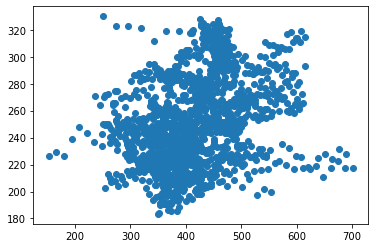

In [44]:
# for i in range(len(yearly_prices)):
#     plt.scatter(rain_ma[i], yearly_prices[i])
plt.scatter(rain_ma, prices)

In [20]:
def generate_windows(window_size):

    n = len(rain) - window_size + 1

    X = np.zeros((n, window_size))
    y = np.zeros(n)

    for i in range(n):
        X[i] = rain[i:i+window_size]
        y[i] = np.mean(prices[21*i:21*(i+1)])
    
    return X, y

In [21]:
for i in range(2, 20):
    X, y = generate_windows(i)
    reg = LinearRegression()
    reg.fit(X, y)
    print(i)
    print(X.shape)
    print(reg.score(X, y)) 

2
(71, 2)
0.11219411527391898
3
(70, 3)
0.11770272700904971
4
(69, 4)
0.11246167932243711
5
(68, 5)
0.11440348250931143
6
(67, 6)
0.12578597697285288
7
(66, 7)
0.12353327154004701
8
(65, 8)
0.12196256340221578
9
(64, 9)
0.12249580517175984
10
(63, 10)
0.12943927868503513
11
(62, 11)
0.14334246817150864
12
(61, 12)
0.1381743142955565
13
(60, 13)
0.13230574741390666
14
(59, 14)
0.16884654607938676
15
(58, 15)
0.19658998329170296
16
(57, 16)
0.23135479469226639
17
(56, 17)
0.20453221735146665
18
(55, 18)
0.21065199068983376
19
(54, 19)
0.22575433393742284


In [22]:
X, y = generate_windows(3)
reg = LinearRegression()
reg.fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.11770272700904971
[ 2.2790961  -0.08148768  0.07962164]
204.064623223388


In [23]:
X, y = generate_windows(6)
reg = LinearRegression()
reg.fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)
print(X[0], y[0])

0.12578597697285288
[ 2.1531901  -0.10836614 -0.03793308  0.13202504  0.30395066  0.7634381 ]
184.36226605192425
[13.82 17.22 17.35 20.63 33.41 20.02] 229.4242857142857


In [24]:
print(scipy.stats.pearsonr(rain_bd, prices))

(0.3366117549711163, 2.2474095003895096e-41)


In [25]:
print(scipy.stats.spearmanr(rain_bd, prices))

SpearmanrResult(correlation=0.3904239393596906, pvalue=3.100922352760803e-56)


In [27]:
print(scipy.stats.pearsonr(rain_bd[1:], prices_diff))

(0.09315469213689247, 0.0002878894370398143)


In [28]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    range(0, len(prices)),
    prices,
)

print(slope, intercept)
print(r_value)

0.053773503430179566 210.2210824442136
0.7239321636830064


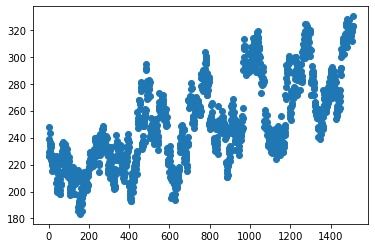

In [29]:
plt.scatter(range(0, len(prices)), prices)

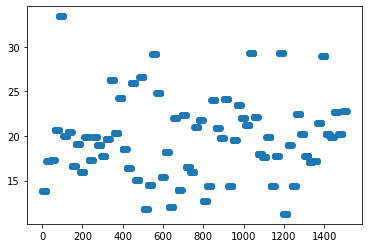

In [30]:
plt.scatter(range(0, len(rain_bd)), rain_bd)

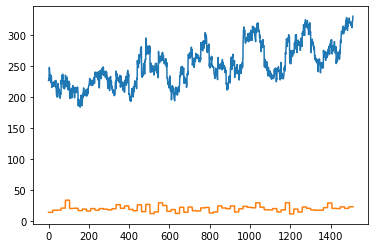

In [31]:
plt.plot(range(0, len(prices)), prices)
plt.plot(range(0, len(rain_bd)), rain_bd)

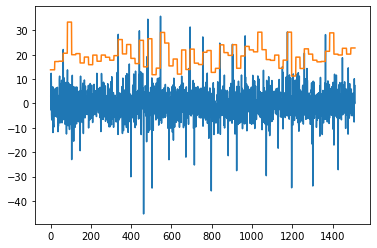

In [33]:
plt.plot(range(1, len(prices_diff)+1), prices_diff)
plt.plot(range(0, len(rain_bd)), rain_bd)

In [45]:
print(prices_diff)

[-1.320e+00  2.600e-01  2.216e+01  1.378e+01 -2.303e+01  4.200e+00
 -1.937e+01  9.640e+00 -1.004e+01  1.150e+00  1.910e+00 -5.120e+00
 -7.310e+00 -9.620e+00 -3.580e+00  2.837e+01 -1.232e+01  5.940e+00
 -3.008e+01 -9.900e+00  2.983e+01 -4.534e+01  3.458e+01 -3.472e+01
  8.340e+00  3.581e+01 -3.230e+00 -2.309e+01 -5.180e+00  5.970e+00
  1.123e+01 -2.202e+01  3.139e+01 -2.525e+01  1.730e+00  2.731e+01
  4.960e+00 -3.588e+01 -8.400e-01  2.476e+01 -8.930e+00 -2.143e+01
  2.427e+01 -2.758e+01 -7.640e+00  2.775e+01 -1.830e+00 -4.500e-01
  1.130e+01 -1.077e+01 -2.964e+01  2.350e+00  9.800e-01  6.810e+00
 -4.630e+00  2.937e+01 -3.461e+01  4.730e+00  1.210e+00  2.066e+01
  3.000e-02 -3.387e+01  2.550e+00 -1.510e+00  2.827e+01  6.270e+00
 -1.707e+01 -2.718e+01  1.878e+01 -4.780e+00 -1.370e+00]


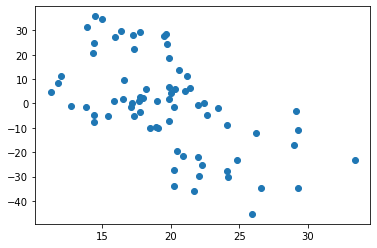

In [52]:
plt.scatter(rain[0:-1], prices_diff)

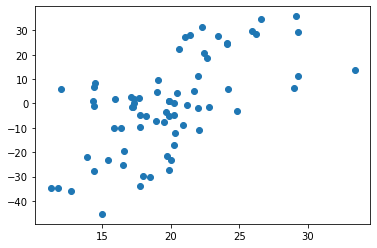

In [53]:
plt.scatter(rain[1:], prices_diff)

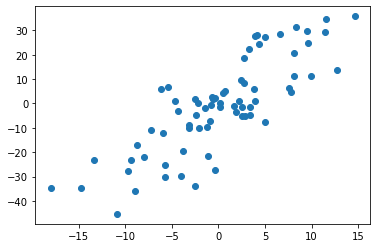

In [54]:
plt.scatter(rain_diff, prices_diff)

In [55]:
scipy.stats.linregress(rain[0:-1], prices_diff)

LinregressResult(slope=-2.460703444681186, intercept=47.4641566499221, rvalue=-0.5770233465558446, pvalue=1.3853777082763248e-07, stderr=0.4192939600398316, intercept_stderr=8.47142809747233)

In [56]:
scipy.stats.linregress(rain[1:], prices_diff)

LinregressResult(slope=2.7327462182175553, intercept=-55.19351442144607, rvalue=0.6349150424578268, pvalue=2.740072288192182e-09, stderr=0.40031669686096066, intercept_stderr=8.133703341324313)

In [57]:
scipy.stats.linregress(rain_diff, prices_diff)

LinregressResult(slope=2.371458680518797, intercept=-1.3119997797782184, rvalue=0.8189643472430225, pvalue=2.639482756514341e-18, stderr=0.20004153139128975, intercept_stderr=1.3210889417329945)

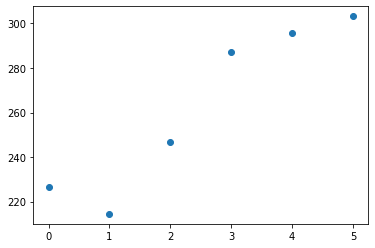

In [59]:
plt.scatter(range(0, len(start_prices)), start_prices)

In [60]:
scipy.stats.linregress(range(len(start_prices)), start_prices)

LinregressResult(slope=19.108, intercept=214.54666666666665, rvalue=0.9389075595636993, pvalue=0.005484422179115311, stderr=3.502149571198759, intercept_stderr=10.603284389342303)

In [ ]:
YEAR = 2018

def update_fairs(self):
